<a href="https://colab.research.google.com/github/alro923/Tensorflow_Study/blob/main/imdb_reviews_subwords8k_Pre_tokenized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBYSCWC/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBYSCWC/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBYSCWC/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
train_data = train_data.shuffle(25000)

train_data_padded = train_data.padded_batch(120, train_data.output_shapes)
test_data_padded = test_data.padded_batch(120, test_data.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [ ]:
tokenizer = info.features['text'].encoder

In [ ]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

tokenizer을 이용하여 encode, decode 하는 과정을 살펴보자.

In [ ]:
# 문자열을 encode 하는 과정
sample_string = "To be honest, Tensorflow is amazing"

tokenized_string = tokenizer.encode(sample_string)
print('Tokenized string is {}'.format(tokenized_string))

Tokenized string is [519, 35, 3275, 2, 6307, 2327, 2934, 7961, 9, 2266]


In [ ]:
# sample string을 하나씩 encode하는 과정을 보여주고 싶었다.

# 1트
# for ss in sample_string:
#   print('{} ---> {}'.format(ss, tokenizer.encode(ss)))

# 2트
# sample_words = sample_string.split()
# for sw in sample_words:
#   print('{} ---> {}'.format(sw, tokenizer.encode(sw)))

# 결론 : encode를 해야 어떻게 tokenized 됐는지를 얻기 때문에, encode되기 전의 문장을 어떻게 tokenized 될지를 예상해서 iterate 할 수는 없다. 안되는 게 정상이다.

In [ ]:
# tokenized된 결과를 decode 하는 과정
original_string = tokenizer.decode(tokenized_string)
print('Original string is {}'.format(original_string))

Original string is To be honest, Tensorflow is amazing


In [ ]:
# tokenized 된 결과 하나씩 decode 해보기
for ts in tokenized_string:
  print('{} ---> {}'.format(ts, tokenizer.decode([ts])))
  # 이 경우, tokenized된 결과를 iterate 하면서 decode 할 수 있다.

519 ---> To 
35 ---> be 
3275 ---> honest
2 ---> , 
6307 ---> Ten
2327 ---> sor
2934 ---> flow
7961 --->  
9 ---> is 
2266 ---> amazing


이렇게, tokenized된 data들이 이미 train_data 와 test_data에 들어가있다는 뜻! (sentences, labels)

In [ ]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 131,069
Trainable params: 131,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(train_data_padded, num_epochs = 30, validation_data= test_data_padded)

Epoch 1/30
209/209 [==============================] - 7s 32ms/step - loss: 0.6911 - accuracy: 0.5480 - val_loss: 0.6856 - val_accuracy: 0.5676
Epoch 2/30
209/209 [==============================] - 7s 31ms/step - loss: 0.6675 - accuracy: 0.6593 - val_loss: 0.6424 - val_accuracy: 0.7560
Epoch 3/30
209/209 [==============================] - 7s 32ms/step - loss: 0.5972 - accuracy: 0.7855 - val_loss: 0.5598 - val_accuracy: 0.8052
Epoch 4/30
209/209 [==============================] - 7s 32ms/step - loss: 0.5046 - accuracy: 0.8346 - val_loss: 0.4786 - val_accuracy: 0.8342
Epoch 5/30
209/209 [==============================] - 7s 32ms/step - loss: 0.4255 - accuracy: 0.8625 - val_loss: 0.4204 - val_accuracy: 0.8519
Epoch 6/30
209/209 [==============================] - 6s 31ms/step - loss: 0.3678 - accuracy: 0.8796 - val_loss: 0.3838 - val_accuracy: 0.8577
Epoch 7/30
209/209 [==============================] - 7s 31ms/step - loss: 0.3287 - accuracy: 0.8908 - val_loss: 0.3556 - val_accuracy: 0.8675

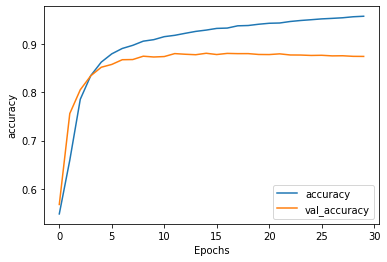

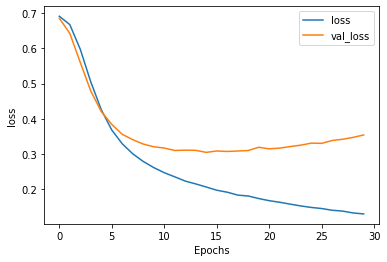

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')